In [34]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp
import datetime
import pylab as plt
import os

from palettable.colorbrewer.qualitative import Paired_11

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [41]:
### automatically gets all dataframes from 'finished_data' folder, 
### so you can add more files and run code withoit
### any chage


def getAllFinished(mypath):
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k))[cols] for k in files}

In [42]:
dfs = getAllFinished('/Users/casy/Dropbox/CUSP/project/Square_cities/data/finished_data/')

In [43]:
def getPercentage(df):
#     df['genCategory'].fillna('Unspecified', inplace=1)
    df['genCategory'].replace('126',np.nan,inplace=1)
    df = df[pd.notnull(df.genCategory)]
    
    x = 100.0*df.groupby('genCategory').size()/len(df)
#     print len(df[pd.isnull(df.genCategory)])
#     print x.sum()
    return x

In [44]:
pDF = pd.DataFrame( {k:getPercentage(v) for k,v in dfs.iteritems()})

In [45]:
pDF

,Moscow,New_York,San Francisco,Shanghai,Singapur,Tokyo
genCategory,,,,,,
Arts & Entertainment,5.444131,4.627007,3.883668,3.504619,3.861515,3.827947
College & University,5.776664,2.628044,2.370948,4.283679,7.373436,1.797429
Event,0.080086,0.083789,0.099320,0.078136,0.064844,0.136169
Food,10.811658,23.498118,21.608475,35.935561,18.542604,27.213745
Nightlife Spot,2.935339,5.234808,4.604375,2.895620,2.725333,5.466779
Outdoors & Recreation,8.858247,6.185745,8.885324,3.745921,8.804706,7.762425
Professional & Other Places,26.499878,22.051098,24.498943,16.852048,28.670507,17.362329
Residence,8.994046,3.920786,3.168055,4.835225,6.190266,1.282390
Shop & Service,23.153661,22.455412,23.724756,17.447258,14.073998,25.900917


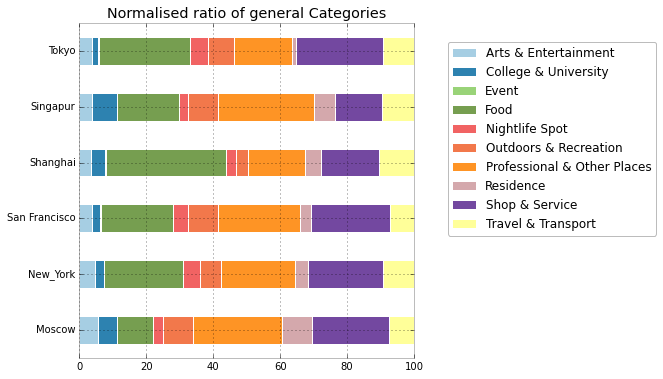

In [47]:
pDF.T.plot(kind='barh',stacked=1, figsize=(6,6), cmap=Paired_11.mpl_colormap,title='Normalised ratio of general Categories' );
plt.legend(loc=(1.1,0.365))
plt.savefig('img/cities_comparison.png')